# Frequency

# Importing useful libraries

In [33]:
# Importing the pandas library for data manipulation
import pandas as pd

# Import numpy library for efficient numeric operations
import numpy as np

# Imports the matplotlib.pyplot library to create graphical visualizations.
import matplotlib.pyplot as plt

from scipy.stats import f_oneway

# Importing the data used

In [4]:
df = pd.read_excel('dados_cancerpositivo.xlsx', index_col = 'Número')

# Defining the functions used to calculate the frequency

In [35]:
''' General probability calculation '''

def frequencia(valor_1, valor_2, valor_3, valor_4):
    # Separating patients who are positive for the desired parameters
    pergunta = df.loc[(valor_1) & (valor_2)] # more restrictive
    # Ensuring that in this selection, all patients have information about the desired parameter
    pergunta.dropna(subset=[valor_3], inplace=True)
    total = len(df.loc[(valor_1) & (valor_2)])
    # Separating the patients who have information for the criteria
    parametro_pergunta = len(pergunta.loc[pergunta[valor_3]==valor_4])
    # Calculating the frequency
    frequencia = round(parametro_pergunta/total, 2)
    
    return frequencia

In [36]:
''' Calculation for probability in lymph nodes'''

def freq_linf(valor_1, valor_2, valor_3):
    # Separating patients who are positive for the desired parameters
    pergunta = (df.loc[(valor_1) & (valor_2)]) # more restrictive
    # Ensuring that in this selection, all patients have information about the desired parameter
    pergunta.dropna(subset=[valor_3], inplace=True)
    total = len(df.loc[(valor_1) & (valor_2)])
    # Separating the patients who have information for the criteria
    parametro_pergunta = len(pergunta.loc[pergunta[valor_3]>= 1.0])
    # Calculating the frequency
    frequencia = round(parametro_pergunta/total, 2)
    
    return frequencia

## Defining function for contingency chi-square test

In [150]:
def chi_teste(variavel_a, variavel_b):
    
    # Calculating the frequency of 1s and 0s in each list
    freq_a = np.array([np.count_nonzero(variavel_a == 1), np.count_nonzero(variavel_a == 0)])
    freq_b = np.array([np.count_nonzero(variavel_b == 1), np.count_nonzero(variavel_b == 0)])

    # Creating the contingency table
    contingency_table = np.array([freq_a, freq_b]).T

    # Performing the Chi-Square test
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    
    
    print("Chi-Square statistic:", chi2)
    print("P-value:", p_value)

    if p_value < 0.05:
        print("There is statistical evidence that the variables are dependent.")
    else:
        print("There is no statistical evidence of dependence between the variables.")

# Calculating the odds

## Menopausal status

What is the frequency of patients exposed to pesticides going through menopause?

In [8]:
menopausa = frequencia(df['Exposure to pesticides']==1, df['Exposure to pesticides']==1, 'Menopausal status', 1)
print('The frequency is', menopausa)

The frequency is 0.62


/usr/local/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


What is the frequency of patients not exposed to pesticides going through menopause?

In [9]:
menopausa_n = frequencia(df['Exposure to pesticides']==0, df['Exposure to pesticides']==0, 'Menopausal status', 1)
print('The frequency is', menopausa_n)

The frequency is 0.63


## Metastasis

What is the frequency of patients exposed to pesticides to develop metastasis?

In [10]:
metastase = frequencia(df['Exposure to pesticides']==1, df['Exposure to pesticides']==1, 'Distant metastasis', 1)
print('The frequency is', metastase)

The frequency is 0.37


What is the frequency of patients not exposed to pesticides to develop metastasis?

In [11]:
metastase_n = frequencia(df['Exposure to pesticides']==0, df['Exposure to pesticides']==0, 'Distant metastasis', 1)
print('The frequency is', metastase_n)

The frequency is 0.26


## Lymph node positivity

What is the frequency of patients exposed to pesticides to develop lymph node positivity?

In [12]:
linfo = freq_linf(df['Exposure to pesticides']==1, df['Exposure to pesticides']==1, 'Lymph node')
print('The frequency is', linfo)

The frequency is 0.33


What is the frequency of patients not exposed to pesticides to develop lymph node positivity?

In [13]:
linfo_n = freq_linf(df['Exposure to pesticides']==0, df['Exposure to pesticides']==0, 'Lymph node')
print('The frequency is', linfo_n)

The frequency is 0.24


## Angiolymphatic emboli

What is the frequency of patients exposed to pesticides to develop angiolymphatic emboli?

In [14]:
emb = frequencia(df['Exposure to pesticides']==1, df['Exposure to pesticides']==1, 'Angiolymphatic emboli', 1)
print('The frequency is', emb)

The frequency is 0.25


What is the frequency of patients not exposed to pesticides to develop angiolymphatic emboli?

In [15]:
emb_n = frequencia(df['Exposure to pesticides']==0, df['Exposure to pesticides']==0, 'Angiolymphatic emboli', 1)
print('The frequency is', emb_n)

The frequency is 0.23


# Plotting graph with probabilities

In [41]:
# Instantiating the probabilities of patients exposed and not exposed to pesticides in a list
prob_exp = [menopausa, metastase, linfo, emb]
prob_nao_exp = [menopausa_n, metastase_n, linfo_n, emb_n]

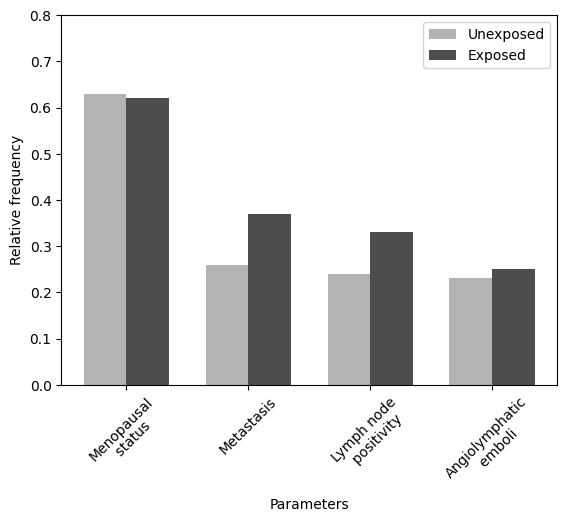

In [44]:
parametros = ['Menopausal status', 'Metastasis', 'Lymph node positivity', 'Angiolymphatic emboli']
frequencia_nao_exp = prob_nao_exp
frequencia_exp = prob_exp


# Setting the y-axis range based on values
y_min = min(frequencia_nao_exp + frequencia_exp)
y_max = max(frequencia_nao_exp + frequencia_exp)
y_min = max(0, y_min - 5)
y_max = y_max + 5

# Defining the width of the bars and adjusting their position
largura_barra = 0.35
x = np.arange(len(parametros))

# Customizing the bar colors
cor_claro = '0.7'  # light gray '#C77DFF'
cor_escuro = '0.3' # darker gray #6A0572'

# Defining the position of the bars side by side
x_nao_exp = x - largura_barra/2
x_exp = x + largura_barra/2

barra1 = plt.bar(x_nao_exp, frequencia_nao_exp, largura_barra, label='Unexposed', color=cor_claro)
barra2 = plt.bar(x_exp, frequencia_exp, largura_barra, label='Exposed', color=cor_escuro)

# Adding labels to axes
plt.xlabel('Parameters')
plt.ylabel('Relative frequency')

# Setting the y-axis range
plt.ylim(0, 0.8)

# List of custom line break strings for each parameter
parametros_quebrados = [
    'Menopausal\n status',
    'Metastasis',
    'Lymph node\n positivity',
    'Angiolymphatic\n emboli'
]

# Display parameter values below bars (with custom line wrapping)
plt.xticks(x, parametros_quebrados, rotation=45)

# Adding a caption
plt.legend()

# Displaying the graph
plt.show()

## Applying the contingency chi-square

In [144]:
# Selecting exposed and unexposed patients
exposed = df.loc[df['Exposure to pesticides']==1]
unexposed = df.loc[df['Exposure to pesticides']==0]

In [146]:
# Applying the test for Menopausal status
chi_teste(exposed['Menopausal status'], unexposed['Menopausal status'])

Chi-Square statistic: 0.0
P-value: 1.0
There is no statistical evidence of dependence between the variables.


In [147]:
# Applying the test for Distant metastasis
chi_teste(exposed['Distant metastasis'], unexposed['Distant metastasis'])

Chi-Square statistic: 2.8380759400804236
P-value: 0.09205438146856784
There is no statistical evidence of dependence between the variables.


In [148]:
# Applying the test for Lymph node
chi_teste(exposed['Lymph node'], unexposed['Lymph node'])

Chi-Square statistic: 1.3087453494453452
P-value: 0.25262194235059776
There is no statistical evidence of dependence between the variables.


In [149]:
# Applying the test for Angiolymphatic emboli
chi_teste(exposed['Angiolymphatic emboli'], unexposed['Angiolymphatic emboli'])

Chi-Square statistic: 0.320276453661387
P-value: 0.5714415537910056
There is no statistical evidence of dependence between the variables.
